# Space Passenger Survival Prediction

In [1]:
import pandas as pd
Train_data= pd.read_csv(r"C:\Users\ankur\OneDrive\Desktop\The IITian Coder\spaceship-titanic\train.csv")
Test_data = pd.read_csv(r"C:\Users\ankur\OneDrive\Desktop\The IITian Coder\spaceship-titanic\test.csv")

In [2]:
Train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
Test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


# Data Cleaning

In [4]:
Train_data.shape

(8693, 14)

In [5]:
Test_data.shape

(4277, 13)

In [6]:
Train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
Test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [8]:
categorical_columns = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

In [9]:
for col in categorical_columns:
    Train_data[col] = Train_data[col].fillna(Train_data[col].mode()[0])
    Test_data[col] = Test_data[col].fillna(Test_data[col].mode()[0])

C:\Users\ankur\AppData\Local\Temp\ipykernel_27468\1918499724.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Train_data[col] = Train_data[col].fillna(Train_data[col].mode()[0])
C:\Users\ankur\AppData\Local\Temp\ipykernel_27468\1918499724.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Test_data[col] = Test_data[col].fillna(Test_data[col].mode()[0])


In [10]:
numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [11]:
for col in numerical_columns:
    Train_data[col] = Train_data[col].fillna(Train_data[col].median())
    Test_data[col] = Test_data[col].fillna(Test_data[col].median())

In [12]:
Train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [13]:
Test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [14]:
Train_data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [15]:
Test_data.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
dtype: int64

In [16]:
Train_data['Cabin'].unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      shape=(6560,), dtype=object)

In [17]:
Train_data[['Deck', 'Num', 'Side']] = Train_data['Cabin'].str.split('/', expand=True)
Test_data[['Deck', 'Num', 'Side']] = Test_data['Cabin'].str.split('/', expand=True)

In [18]:
Train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


# Visualization

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\ankur\AppData\Local\Temp\ipykernel_27468\396507403.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Train_data, x='CryoSleep', palette='dark')
C:\Users\ankur\AppData\Local\Temp\ipykernel_27468\396507403.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Train_data, x='VIP', palette='deep')


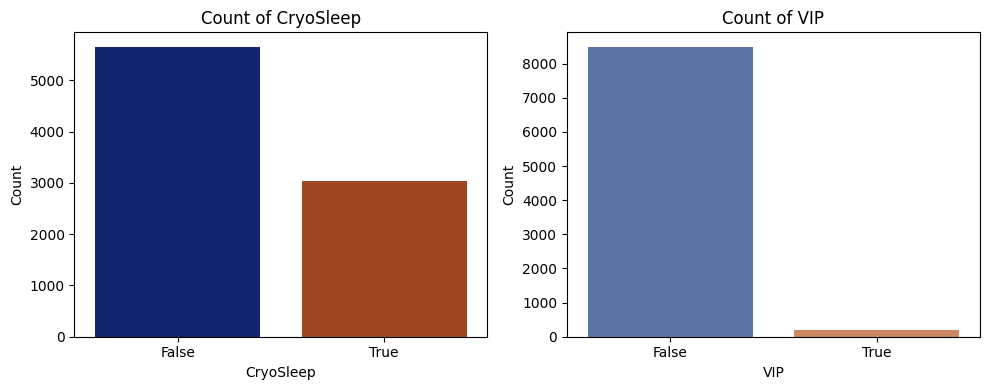

In [20]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.countplot(data=Train_data, x='CryoSleep', palette='dark')
plt.title('Count of CryoSleep')
plt.xlabel('CryoSleep')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(data=Train_data, x='VIP', palette='deep')
plt.title('Count of VIP')
plt.xlabel('VIP')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

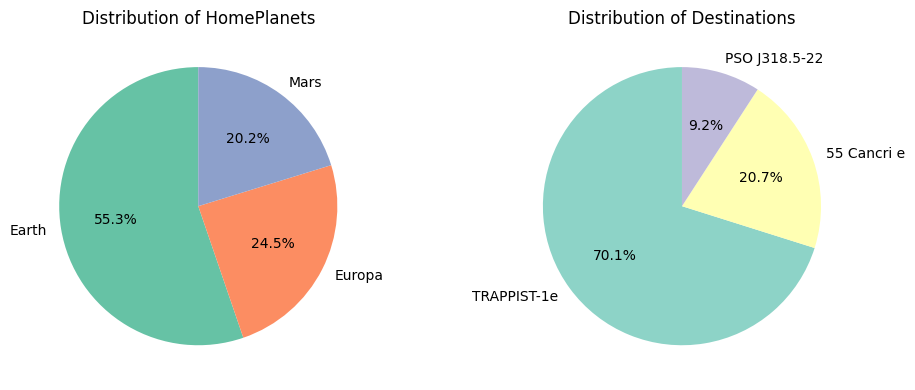

In [21]:
import matplotlib.pyplot as plt

# Count occurrences for HomePlanet and Destination
home_planet_counts = Train_data['HomePlanet'].value_counts()
destination_counts = Train_data['Destination'].value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot for HomePlanet
axes[0].pie(home_planet_counts, autopct='%1.1f%%', startangle=90, 
            colors=['#66c2a5', '#fc8d62', '#8da0cb'], labels=home_planet_counts.index)
axes[0].set_title("Distribution of HomePlanets")

# Plot for Destination
axes[1].pie(destination_counts, autopct='%1.1f%%', startangle=90, 
            colors=['#8dd3c7', '#ffffb3', '#bebada'], labels=destination_counts.index)
axes[1].set_title("Distribution of Destinations")

# Adjust layout
plt.tight_layout()
plt.show()


In [22]:
import numpy as np

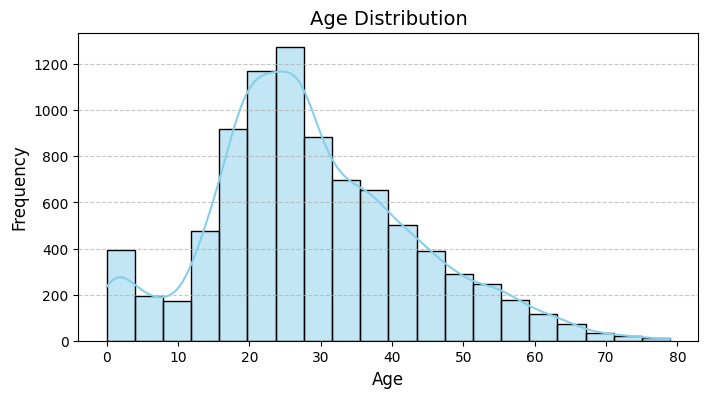

In [23]:
plt.figure(figsize=(8, 4))
sns.histplot(Train_data['Age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###  Passenger Expenditure Categories

- **RoomService**: Money spent on room service during the journey.
- **FoodCourt**: Money spent in the food court for meals and snacks.
- **ShoppingMall**: Money spent on shopping activities.
- **Spa**: Money spent on spa services for relaxation and wellness.
- **VRDeck**: Money spent on virtual reality activities and entertainment.


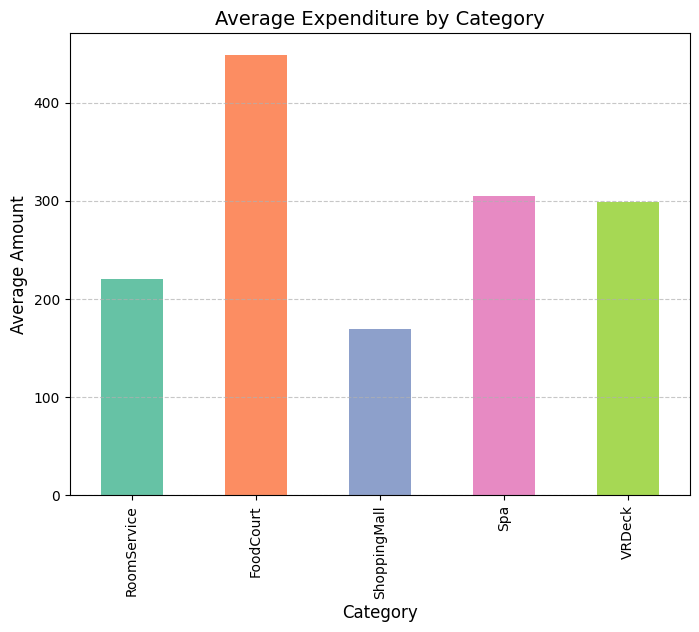

In [24]:
expenditure_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
avg_expenditure = Train_data[expenditure_cols].mean()

plt.figure(figsize=(8, 6))
avg_expenditure.plot.bar(color=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854'])
plt.title('Average Expenditure by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Amount', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [25]:
Train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


# Label Encoder

In [26]:
from sklearn.preprocessing import LabelEncoder

label_columns = ['HomePlanet', 'Deck', 'Side', 'CryoSleep', 'Destination', 'VIP']
label_encoders = {}

for col in label_columns:
    le = LabelEncoder()
    
    # Fit on Train and transform both Train and Test
    Train_data[col] = le.fit_transform(Train_data[col].astype(str))
    Test_data[col] = le.fit_transform(Test_data[col].astype(str))
    
    # Store the LabelEncoder instance
    label_encoders[col] = le


In [27]:
Train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,1,0,B/0/P,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0,0
1,0002_01,0,0,F/0/S,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,5,0,1
2,0003_01,1,0,A/0/S,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,0,1
3,0003_02,1,0,A/0/S,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,0,1
4,0004_01,0,0,F/1/S,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,5,1,1


In [28]:
Test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Num,Side
0,0013_01,0,1,G/3/S,2,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,6,3,1
1,0018_01,0,0,F/4/S,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,5,4,1
2,0019_01,1,1,C/0/S,0,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,2,0,1
3,0021_01,1,0,C/1/S,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,2,1,1
4,0023_01,0,0,F/5/S,2,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,5,5,1


# Splitting Data

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x = Train_data.drop(columns=['Transported','Cabin','PassengerId','Name'])
y = Train_data['Transported']

In [31]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [32]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
x_train['Destination'].value_counts()

Destination
2    4872
0    1448
1     634
Name: count, dtype: int64

In [34]:
x_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
2333,0,0,2,28.0,0,0.0,55.0,0.0,656.0,0.0,6,734,1
2589,0,0,2,17.0,0,0.0,1195.0,31.0,0.0,0.0,5,575,0
8302,1,1,0,28.0,0,0.0,0.0,0.0,0.0,0.0,2,329,1
8177,2,0,2,20.0,0,0.0,2.0,289.0,976.0,0.0,5,1800,0
500,1,1,0,36.0,0,0.0,0.0,0.0,0.0,0.0,2,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0,0,2,18.0,0,14.0,2.0,144.0,610.0,0.0,6,988,1
5191,2,0,2,50.0,0,690.0,0.0,30.0,762.0,428.0,5,1063,1
5390,0,0,1,22.0,0,158.0,0.0,476.0,0.0,26.0,5,1194,0
860,2,0,2,34.0,0,379.0,0.0,1626.0,0.0,0.0,5,191,0


In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(6954, 13)
(6954,)
(1739, 13)
(1739,)


In [36]:
x_test = Test_data.drop(columns=['Cabin'])

In [37]:
print(x_test.shape)

(4277, 15)


# Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

# Apply Model

### **Random Forest**

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
rfc_model = RandomForestClassifier(random_state=42)
rfc_model.fit(x_train, y_train)
y_pred_rfc = rfc_model.predict(x_val)

accuracy_rfc = accuracy_score(y_val, y_pred_rfc)
print(f"Accuracy: {accuracy_rfc:.2f}\n")
print("Classification Report:")
print(classification_report(y_val, y_pred_rfc))

Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       861
           1       0.80      0.78      0.79       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



### **XGBClassifier**

In [40]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
xgb_model = XGBClassifier(enable_categorical=True)
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_val)

accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}\n")
print("XGBoost Classification Report:")
print(classification_report(y_val, y_pred_xgb))

XGBoost Accuracy: 0.80

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       861
           1       0.80      0.80      0.80       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



### **Lightgbm**

In [43]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score
lgbm_model = LGBMClassifier()
lgbm_model.fit(x_train, y_train)
y_pred_lgbm = lgbm_model.predict(x_val)

accuracy_lgbm = accuracy_score(y_val, y_pred_lgbm)
print(f"LightGBM Accuracy: {accuracy_lgbm:.2f}\n")
print("LightGBM Classification Report:")
print(classification_report(y_val, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1635
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503307 -> initscore=0.013230
[LightGBM] [Info] Start training from score 0.013230
LightGBM Accuracy: 0.81

LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       861
           1       0.80      0.82      0.81       878

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



C:\Users\ankur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [44]:
y_pred_lgbm[:100]

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0])

In [45]:
y_val[:100]

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0])

In [46]:
x_test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Num,Side
0,0013_01,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,6,3,1
1,0018_01,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,5,4,1
2,0019_01,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,2,0,1
3,0021_01,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,2,1,1
4,0023_01,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,5,5,1


In [47]:
new_x_test = x_test.drop(columns=['Name','PassengerId'], axis=1)


In [48]:
new_x_test.head(20)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,6,3,1
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,5,4,1
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,2,0,1
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,2,1,1
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,5,5,1
5,0,0,2,31.0,0,0.0,1615.0,263.0,113.0,60.0,5,7,0
6,1,1,0,21.0,0,0.0,0.0,0.0,0.0,0.0,1,2,0
7,1,1,2,20.0,0,0.0,0.0,0.0,0.0,0.0,3,0,1
8,1,1,0,23.0,0,0.0,0.0,0.0,0.0,0.0,3,0,1
9,0,0,0,24.0,0,0.0,639.0,0.0,0.0,0.0,5,7,1


In [49]:
print(new_x_test.dtypes)


HomePlanet        int64
CryoSleep         int64
Destination       int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Deck              int64
Num              object
Side              int64
dtype: object


In [50]:
new_x_test['Num'] = pd.to_numeric(new_x_test['Num'], errors='coerce')

In [51]:
import pandas as pd

y_test_pred = lgbm_model.predict(new_x_test)

Transported_pred = (y_test_pred > 0.5)  # Convert probabilities to True/False

submission = pd.DataFrame({
    'PassengerId': x_test['PassengerId'],  # Replace with the actual column name
    'Transported': Transported_pred
})

submission.to_csv('submission.csv', index=False)

print("Submission file created: submission.csv")


Submission file created: submission.csv


In [52]:
file_path = r"C:\Users\ankur\OneDrive\Desktop\The IITian Coder\spaceship-titanic.csv"

# Save the file
submission.to_csv(file_path, index=False)

print(f"Submission file created: {file_path}")


Submission file created: C:\Users\ankur\OneDrive\Desktop\The IITian Coder\spaceship-titanic.csv


In [53]:
import tensorflow as tf

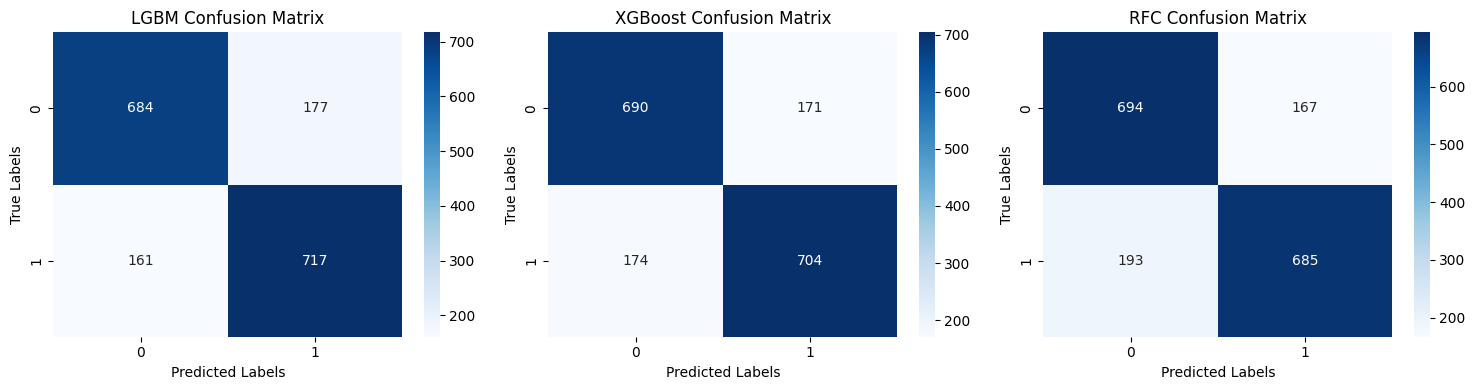

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  

conf_mat_lgbm = tf.math.confusion_matrix(labels=y_val, predictions=y_pred_lgbm)
sns.heatmap(conf_mat_lgbm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('LGBM Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

conf_mat_xgb = tf.math.confusion_matrix(labels=y_val, predictions=y_pred_xgb)
sns.heatmap(conf_mat_xgb, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('XGBoost Confusion Matrix')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

conf_mat_rfc = tf.math.confusion_matrix(labels=y_val, predictions=y_pred_rfc)
sns.heatmap(conf_mat_rfc, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('RFC Confusion Matrix')
axes[2].set_xlabel('Predicted Labels')
axes[2].set_ylabel('True Labels')

plt.tight_layout()
plt.show()